# Modeling of chlorophyll

Take the depth -1.5 m, time1 1 April 2018 - 30 April 2019

1.1 Basic tools import 

In [1]:
import os 
import numpy as np
import pandas as pd
import xarray as xr

1.2 Function tool selection

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.spatial import cKDTree

import matplotlib.dates as dates
from matplotlib.dates import MonthLocator, DateFormatter

1.3 Use urllib module to prepare data extraction

In [3]:
import urllib.request
import datetime as dt
import netCDF4
from netCDF4 import Dataset, num2date

2.1 Data script judgment

In [4]:
if not os.path.exists('temp'):
    os.makedirs('temp')
    
extractionfile = os.path.join('temp','2110.38d9787-collected.csv')
if not os.path.exists(extractionfile):
    print("Downloading extraction data ...")
    url = 'https://api.ereefs.aims.gov.au/data-extraction/request/2110.38d9787/files/2110.38d9787-collected.csv'
    req = urllib.request.urlretrieve(url, extractionfile)
    print(req)
else:
    print("Skipping redownloading extraction data")    

Skipping redownloading extraction data


2.2 Download the data set

In [5]:
df=pd.read_csv(extractionfile)

df['Aggregated Date/Time']=pd.to_datetime(df['Aggregated Date/Time']).dt.date#Creating new column with just the date
data=pd.DataFrame(df,columns=['Aggregated Date/Time','Variable','Site Name','mean'])
  

3.1 for loop + if judgment

In [6]:
y1 = [] 
y2 = [] 
x = []  
t = 0   

for name in data['Site Name']:          
    if name == 'site1':                 
        y1.append(data['mean'][t])   
        x.append(data['Aggregated Date/Time'][t])   
    elif name == 'site2':
        y2.append(data['mean'][t])
    t += 1




4.1 Graphics Settings

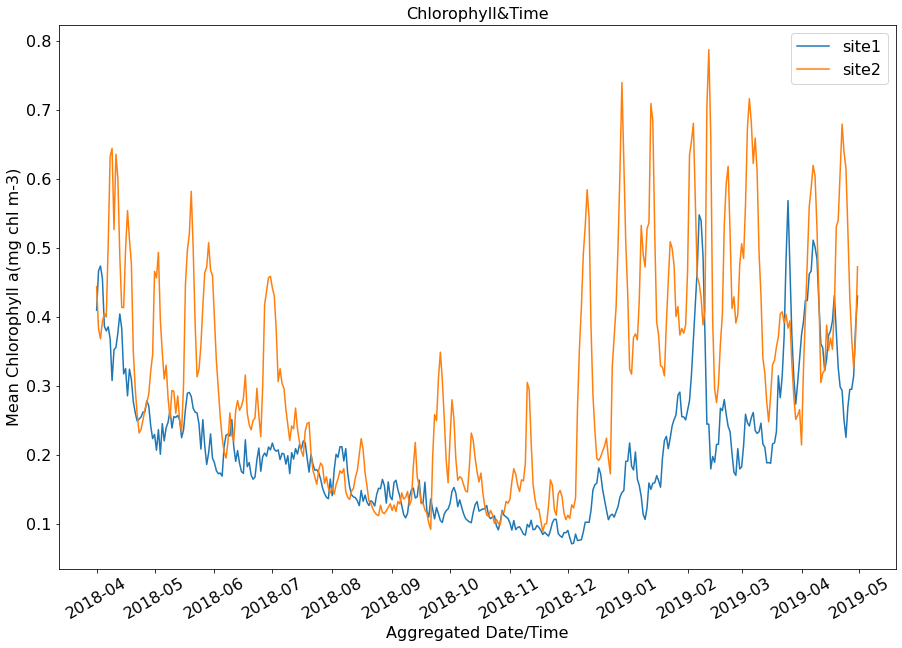

In [7]:
fig = plt.figure(figsize=(15, 10))
plt.plot(x, y1, label='site1')
plt.plot(x, y2, label='site2')


ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator())


plt.xlabel('Aggregated Date/Time', size=16)
plt.xticks(rotation=30,size=16)
plt.ylabel('Mean Chlorophyll a(mg chl m-3)', size=16)
plt.yticks(size=16)
plt.title(u'Chlorophyll&Time', size=16)
plt.legend(fontsize='16')



4.2 Save and draw the diagram

In [ ]:
plt.savefig('Chlorophyll&Time.jpg')
plt.show()

The figure indicates that the concentration of Chlorophyll of both sites are generally lower in winter and higher in summer, but there is an abnormal increase on the concentration of Chlorophyll of site 2 when close to spring. The concentration of Chlorophyll of site 2 are almost always higher than site 1's.

# Temperature

1.1 Download the data set

In [8]:
if not os.path.exists('temp'):
    os.makedirs('temp')
extractionfile = os.path.join('temp','2109.af44c96-collected.csv')
if not os.path.exists(extractionfile):
    print("Downloading extraction data ...")
    url = 'https://api.ereefs.aims.gov.au/data-extraction/request/2109.af44c96/files/2109.af44c96-collected.csv'
    req = urllib.request.urlretrieve(url, extractionfile)
    print(req)
else:
    print("Skipping redownloading extraction data")    


df = pd.read_csv(extractionfile)
df['Aggregated Date/Time']=pd.to_datetime(df['Aggregated Date/Time'],format="%Y-%m-%d")
df#.head()

Skipping redownloading extraction data


,Aggregated Date/Time,Variable,Depth,Site Name,Latitude,Longitude,mean,median,p5,p95,lowest,highest
0,2018-04-01,temp,-1.5,site1,-14.4346,144.0816,29.880609,29.853224,29.529013,30.432688,29.517618,30.432688
1,2018-04-01,temp,-1.5,site2,-21.2411,149.2713,27.103434,27.105036,26.986005,27.219763,26.983618,27.219763
2,2018-04-02,temp,-1.5,site1,-14.4346,144.0816,30.064850,29.949697,29.742831,30.608252,29.742408,30.608252
3,2018-04-02,temp,-1.5,site2,-21.2411,149.2713,26.887001,26.881163,26.768199,27.051495,26.766281,27.051495
4,2018-04-03,temp,-1.5,site1,-14.4346,144.0816,30.222772,30.176766,29.951059,30.711454,29.950631,30.711454
...,...,...,...,...,...,...,...,...,...,...,...,...
785,2019-04-28,temp,-1.5,site2,-21.2411,149.2713,25.574548,25.550333,25.471748,25.707688,25.470885,25.707688
786,2019-04-29,temp,-1.5,site1,-14.4346,144.0816,27.553405,27.531627,27.408454,27.756996,27.407329,27.756996
787,2019-04-29,temp,-1.5,site2,-21.2411,149.2713,25.412674,25.410378,25.315695,25.528597,25.249404,25.528597
788,2019-04-30,temp,-1.5,site1,-14.4346,144.0816,27.273883,27.255662,27.158093,27.428784,27.156459,27.428784


1.2 Groupby

In [9]:
gb = df.groupby("Site Name")
gb
groups=gb.groups
len(groups)
len(gb)
list(groups.keys())

['site1', 'site2']

1.3 Depart sites-T¶
Site 1

In [10]:
gb.get_group("site1")

,Aggregated Date/Time,Variable,Depth,Site Name,Latitude,Longitude,mean,median,p5,p95,lowest,highest
0,2018-04-01,temp,-1.5,site1,-14.4346,144.0816,29.880609,29.853224,29.529013,30.432688,29.517618,30.432688
2,2018-04-02,temp,-1.5,site1,-14.4346,144.0816,30.064850,29.949697,29.742831,30.608252,29.742408,30.608252
4,2018-04-03,temp,-1.5,site1,-14.4346,144.0816,30.222772,30.176766,29.951059,30.711454,29.950631,30.711454
6,2018-04-04,temp,-1.5,site1,-14.4346,144.0816,30.226421,30.213241,30.058030,30.473200,30.057116,30.473200
8,2018-04-05,temp,-1.5,site1,-14.4346,144.0816,30.175907,30.105108,29.852921,30.714973,29.837151,30.714973
...,...,...,...,...,...,...,...,...,...,...,...,...
780,2019-04-26,temp,-1.5,site1,-14.4346,144.0816,28.228589,28.216247,28.027549,28.463634,28.017093,28.463634
782,2019-04-27,temp,-1.5,site1,-14.4346,144.0816,28.065582,28.095082,27.857802,28.259309,27.852911,28.259309
784,2019-04-28,temp,-1.5,site1,-14.4346,144.0816,27.818710,27.825488,27.673044,27.984811,27.658223,27.984811
786,2019-04-29,temp,-1.5,site1,-14.4346,144.0816,27.553405,27.531627,27.408454,27.756996,27.407329,27.756996


1.4 Site 2

In [32]:
gb.get_group("site2")

,Aggregated Date/Time,Variable,Depth,Site Name,Latitude,Longitude,mean,median,p5,p95,lowest,highest
1,2018-04-01,temp,-1.5,site2,-21.2411,149.2713,27.103434,27.105036,26.986005,27.219763,26.983618,27.219763
3,2018-04-02,temp,-1.5,site2,-21.2411,149.2713,26.887001,26.881163,26.768199,27.051495,26.766281,27.051495
5,2018-04-03,temp,-1.5,site2,-21.2411,149.2713,26.596865,26.604017,26.444401,26.817394,26.435665,26.817394
7,2018-04-04,temp,-1.5,site2,-21.2411,149.2713,26.203007,26.188687,26.035090,26.498463,26.002509,26.498463
9,2018-04-05,temp,-1.5,site2,-21.2411,149.2713,25.894449,25.893430,25.693354,26.107542,25.678594,26.107542
...,...,...,...,...,...,...,...,...,...,...,...,...
781,2019-04-26,temp,-1.5,site2,-21.2411,149.2713,25.783893,25.791178,25.647348,25.901824,25.641611,25.901824
783,2019-04-27,temp,-1.5,site2,-21.2411,149.2713,25.715854,25.730101,25.631323,25.801561,25.616944,25.801561
785,2019-04-28,temp,-1.5,site2,-21.2411,149.2713,25.574548,25.550333,25.471748,25.707688,25.470885,25.707688
787,2019-04-29,temp,-1.5,site2,-21.2411,149.2713,25.412674,25.410378,25.315695,25.528597,25.249404,25.528597


2.1 Chl a

In [12]:
if not os.path.exists('temp'):
    os.makedirs('temp')
extractionfile = os.path.join('temp','2109.3569a90-collected.csv')
if not os.path.exists(extractionfile):
    print("Downloading extraction data ...")
    url = 'https://api.ereefs.aims.gov.au/data-extraction/request/2109.3569a90/files/2109.3569a90-collected.csv'
    req = urllib.request.urlretrieve(url, extractionfile)
    print(req)
else:
    print("Skipping redownloading extraction data")
df1= pd.read_csv(extractionfile)
df1['Aggregated Date/Time']=pd.to_datetime(df['Aggregated Date/Time'],format="%Y-%m-%d")
df1#.head()

Skipping redownloading extraction data


,Aggregated Date/Time,Variable,Depth,Site Name,Latitude,Longitude,mean,median,p5,p95,lowest,highest
0,2018-04-01,Chl_a_sum,-1.5,site1,-14.4346,144.0816,0.409621,0.409621,0.409621,0.409621,0.409621,0.409621
1,2018-04-01,Chl_a_sum,-1.5,site2,-21.2411,149.2713,0.443918,0.443918,0.443918,0.443918,0.443918,0.443918
2,2018-04-02,Chl_a_sum,-1.5,site1,-14.4346,144.0816,0.467088,0.467088,0.467088,0.467088,0.467088,0.467088
3,2018-04-02,Chl_a_sum,-1.5,site2,-21.2411,149.2713,0.382951,0.382951,0.382951,0.382951,0.382951,0.382951
4,2018-04-03,Chl_a_sum,-1.5,site1,-14.4346,144.0816,0.473810,0.473810,0.473810,0.473810,0.473810,0.473810
...,...,...,...,...,...,...,...,...,...,...,...,...
785,2019-04-28,Chl_a_sum,-1.5,site2,-21.2411,149.2713,0.326025,0.326025,0.326025,0.326025,0.326025,0.326025
786,2019-04-29,Chl_a_sum,-1.5,site1,-14.4346,144.0816,0.385878,0.385878,0.385878,0.385878,0.385878,0.385878
787,2019-04-29,Chl_a_sum,-1.5,site2,-21.2411,149.2713,0.371617,0.371617,0.371617,0.371617,0.371617,0.371617
788,2019-04-30,Chl_a_sum,-1.5,site1,-14.4346,144.0816,0.430119,0.430119,0.430119,0.430119,0.430119,0.430119


2.2 Groupby

In [13]:
gb1 = df1.groupby("Site Name")
#gb1 = df1.head().groupby("Site Name")
gb1

In [14]:
groups1=gb1.groups
len(groups1)

2

In [15]:
len(gb1)

2

In [16]:
list(groups1.keys())

['site1', 'site2']

2.3 Depart sites-Chl a
Site 1¶

In [33]:
gb1.get_group("site1")

,Aggregated Date/Time,Variable,Depth,Site Name,Latitude,Longitude,mean,median,p5,p95,lowest,highest
0,2018-04-01,Chl_a_sum,-1.5,site1,-14.4346,144.0816,0.409621,0.409621,0.409621,0.409621,0.409621,0.409621
2,2018-04-02,Chl_a_sum,-1.5,site1,-14.4346,144.0816,0.467088,0.467088,0.467088,0.467088,0.467088,0.467088
4,2018-04-03,Chl_a_sum,-1.5,site1,-14.4346,144.0816,0.473810,0.473810,0.473810,0.473810,0.473810,0.473810
6,2018-04-04,Chl_a_sum,-1.5,site1,-14.4346,144.0816,0.455299,0.455299,0.455299,0.455299,0.455299,0.455299
8,2018-04-05,Chl_a_sum,-1.5,site1,-14.4346,144.0816,0.386585,0.386585,0.386585,0.386585,0.386585,0.386585
...,...,...,...,...,...,...,...,...,...,...,...,...
780,2019-04-26,Chl_a_sum,-1.5,site1,-14.4346,144.0816,0.294762,0.294762,0.294762,0.294762,0.294762,0.294762
782,2019-04-27,Chl_a_sum,-1.5,site1,-14.4346,144.0816,0.295012,0.295012,0.295012,0.295012,0.295012,0.295012
784,2019-04-28,Chl_a_sum,-1.5,site1,-14.4346,144.0816,0.314205,0.314205,0.314205,0.314205,0.314205,0.314205
786,2019-04-29,Chl_a_sum,-1.5,site1,-14.4346,144.0816,0.385878,0.385878,0.385878,0.385878,0.385878,0.385878


2.4 Site 2

In [18]:
gb1.get_group("site2")#.head()
#choose site2

,Aggregated Date/Time,Variable,Depth,Site Name,Latitude,Longitude,mean,median,p5,p95,lowest,highest
1,2018-04-01,Chl_a_sum,-1.5,site2,-21.2411,149.2713,0.443918,0.443918,0.443918,0.443918,0.443918,0.443918
3,2018-04-02,Chl_a_sum,-1.5,site2,-21.2411,149.2713,0.382951,0.382951,0.382951,0.382951,0.382951,0.382951
5,2018-04-03,Chl_a_sum,-1.5,site2,-21.2411,149.2713,0.368227,0.368227,0.368227,0.368227,0.368227,0.368227
7,2018-04-04,Chl_a_sum,-1.5,site2,-21.2411,149.2713,0.393213,0.393213,0.393213,0.393213,0.393213,0.393213
9,2018-04-05,Chl_a_sum,-1.5,site2,-21.2411,149.2713,0.404964,0.404964,0.404964,0.404964,0.404964,0.404964
...,...,...,...,...,...,...,...,...,...,...,...,...
781,2019-04-26,Chl_a_sum,-1.5,site2,-21.2411,149.2713,0.428104,0.428104,0.428104,0.428104,0.428104,0.428104
783,2019-04-27,Chl_a_sum,-1.5,site2,-21.2411,149.2713,0.367600,0.367600,0.367600,0.367600,0.367600,0.367600
785,2019-04-28,Chl_a_sum,-1.5,site2,-21.2411,149.2713,0.326025,0.326025,0.326025,0.326025,0.326025,0.326025
787,2019-04-29,Chl_a_sum,-1.5,site2,-21.2411,149.2713,0.371617,0.371617,0.371617,0.371617,0.371617,0.371617


3 Pick up mean values and rename it¶



3.1 Temperature
Site 1


In [19]:
temp_site1=gb.get_group("site1").loc[:,["Aggregated Date/Time","Site Name","mean"]]
t1=temp_site1.rename(columns={"mean":"Mean Temp"})
t1

,Aggregated Date/Time,Site Name,Mean Temp
0,2018-04-01,site1,29.880609
2,2018-04-02,site1,30.064850
4,2018-04-03,site1,30.222772
6,2018-04-04,site1,30.226421
8,2018-04-05,site1,30.175907
...,...,...,...
780,2019-04-26,site1,28.228589
782,2019-04-27,site1,28.065582
784,2019-04-28,site1,27.818710
786,2019-04-29,site1,27.553405


3.2 Site 2

In [20]:
temp_site2=gb.get_group("site2").loc[:,["Aggregated Date/Time","Site Name","mean"]]

t2=temp_site2.rename(columns={"mean":"Mean Temp"})
t2

,Aggregated Date/Time,Site Name,Mean Temp
1,2018-04-01,site2,27.103434
3,2018-04-02,site2,26.887001
5,2018-04-03,site2,26.596865
7,2018-04-04,site2,26.203007
9,2018-04-05,site2,25.894449
...,...,...,...
781,2019-04-26,site2,25.783893
783,2019-04-27,site2,25.715854
785,2019-04-28,site2,25.574548
787,2019-04-29,site2,25.412674


3.3 Chl a¶
Site 1

In [21]:
Chl_a_site1=gb1.get_group("site1").loc[:,["Site Name","mean"]]
c1=Chl_a_site1.rename(columns={"mean":"Mean Chl a"})
c1

,Site Name,Mean Chl a
0,site1,0.409621
2,site1,0.467088
4,site1,0.473810
6,site1,0.455299
8,site1,0.386585
...,...,...
780,site1,0.294762
782,site1,0.295012
784,site1,0.314205
786,site1,0.385878


3.4 Site 2

In [22]:
Chl_a_site2=gb1.get_group("site2").loc[:,["Site Name","mean"]]
c2=Chl_a_site2.rename(columns={"mean":"Mean Chl a"})
c2

,Site Name,Mean Chl a
1,site2,0.443918
3,site2,0.382951
5,site2,0.368227
7,site2,0.393213
9,site2,0.404964
...,...,...
781,site2,0.428104
783,site2,0.367600
785,site2,0.326025
787,site2,0.371617


3.5 Drop site names of chl a¶
Site 1

In [23]:
c1_drop=c1.drop("Site Name",axis=1)

3.6 Site 2

In [24]:
c2_drop=c2.drop("Site Name",axis=1)

3.7 Combine dropped datasets of temperature and chl a¶
Site 1

In [25]:
site1=pd.concat([t1,c1_drop],axis=1,join='outer',ignore_index=False)
site1

,Aggregated Date/Time,Site Name,Mean Temp,Mean Chl a
0,2018-04-01,site1,29.880609,0.409621
2,2018-04-02,site1,30.064850,0.467088
4,2018-04-03,site1,30.222772,0.473810
6,2018-04-04,site1,30.226421,0.455299
8,2018-04-05,site1,30.175907,0.386585
...,...,...,...,...
780,2019-04-26,site1,28.228589,0.294762
782,2019-04-27,site1,28.065582,0.295012
784,2019-04-28,site1,27.818710,0.314205
786,2019-04-29,site1,27.553405,0.385878


3.8 Site 2

In [26]:
site2=pd.concat([t2,c2_drop],axis=1,join='outer',ignore_index=False)
site2

,Aggregated Date/Time,Site Name,Mean Temp,Mean Chl a
1,2018-04-01,site2,27.103434,0.443918
3,2018-04-02,site2,26.887001,0.382951
5,2018-04-03,site2,26.596865,0.368227
7,2018-04-04,site2,26.203007,0.393213
9,2018-04-05,site2,25.894449,0.404964
...,...,...,...,...
781,2019-04-26,site2,25.783893,0.428104
783,2019-04-27,site2,25.715854,0.367600
785,2019-04-28,site2,25.574548,0.326025
787,2019-04-29,site2,25.412674,0.371617


3.9 Combine site 1 and site 2 datasets

In [27]:
dt=pd.concat([site1,site2],axis=0,join='outer',ignore_index=False)
dt

,Aggregated Date/Time,Site Name,Mean Temp,Mean Chl a
0,2018-04-01,site1,29.880609,0.409621
2,2018-04-02,site1,30.064850,0.467088
4,2018-04-03,site1,30.222772,0.473810
6,2018-04-04,site1,30.226421,0.455299
8,2018-04-05,site1,30.175907,0.386585
...,...,...,...,...
781,2019-04-26,site2,25.783893,0.428104
783,2019-04-27,site2,25.715854,0.367600
785,2019-04-28,site2,25.574548,0.326025
787,2019-04-29,site2,25.412674,0.371617


# 4 Line charts

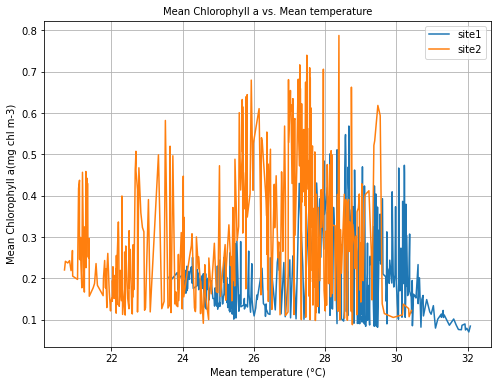

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Mean temperature (°C)',fontsize=10)
plt.ylabel('Mean Chlorophyll a(mg chl m-3)',fontsize=10)
sns.lineplot(x="Mean Temp",y="Mean Chl a",hue="Site Name",data=dt)
plt.legend(fontsize='10')
plt.grid()
plt.title('Mean Chlorophyll a vs. Mean temperature',size='10')
plt.savefig('Mean Chlorophyll a vs. Mean temperature.jpg')

The concentration of Chlorophyll in high temperature are higher than the concentration of Chlorophyll in low temperature, and the concentration of Chlorophyll usually would reach the highest value when the temperature is around 28°C. The response to temperature of the concentration of Chlorophyll of site 2 is more sensitive than site 1's.

# The three-dimensional relationship of chlorophyll, time, and temperature

1.1 Basic tools import & Function tool selection Use 

In [34]:
import os 
import numpy as np
import pandas as pd
import urllib.request
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib inline  

import matplotlib.dates as dates
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import NullFormatter

2.1 Download the data set

In [35]:
if not os.path.exists('temp'):
    os.makedirs('temp')
extractionfile = os.path.join('temp','2109.3cb0eda-collected.csv')
if not os.path.exists(extractionfile):
    print("Downloading extraction data ...")
    url = 'https://api.ereefs.aims.gov.au/data-extraction/request/2109.3cb0eda/files/2109.3cb0eda-collected.csv'
    req = urllib.request.urlretrieve(url, extractionfile)
    print(req)
else:
    print("Skipping redownloading extraction data")
    
df=pd.read_csv(extractionfile)   

df['Aggregated Date/Time']=pd.to_datetime(df['Aggregated Date/Time']).dt.date #Creating new column with just the date
data=pd.DataFrame(df,columns=['Aggregated Date/Time','Variable','Site Name','mean'])

if not os.path.exists('temp'):
    os.makedirs('temp')
extractionfile = os.path.join('temp','2109.5f38ae7-collected.csv')
if not os.path.exists(extractionfile):
    print("Downloading extraction data ...")
    url = 'https://api.ereefs.aims.gov.au/data-extraction/request/2109.5f38ae7/files/2109.5f38ae7-collected.csv'
    req = urllib.request.urlretrieve(url, extractionfile)
    print(req)
else:
    print("Skipping redownloading extraction data")
    
df2=pd.read_csv(extractionfile)     

df2['Aggregated Date/Time']=pd.to_datetime(df2['Aggregated Date/Time']).dt.date
data=pd.DataFrame(df2,columns=['Aggregated Date/Time','Variable','Site Name','mean'])


Skipping redownloading extraction data
Skipping redownloading extraction data


3.1 3d graphics writing

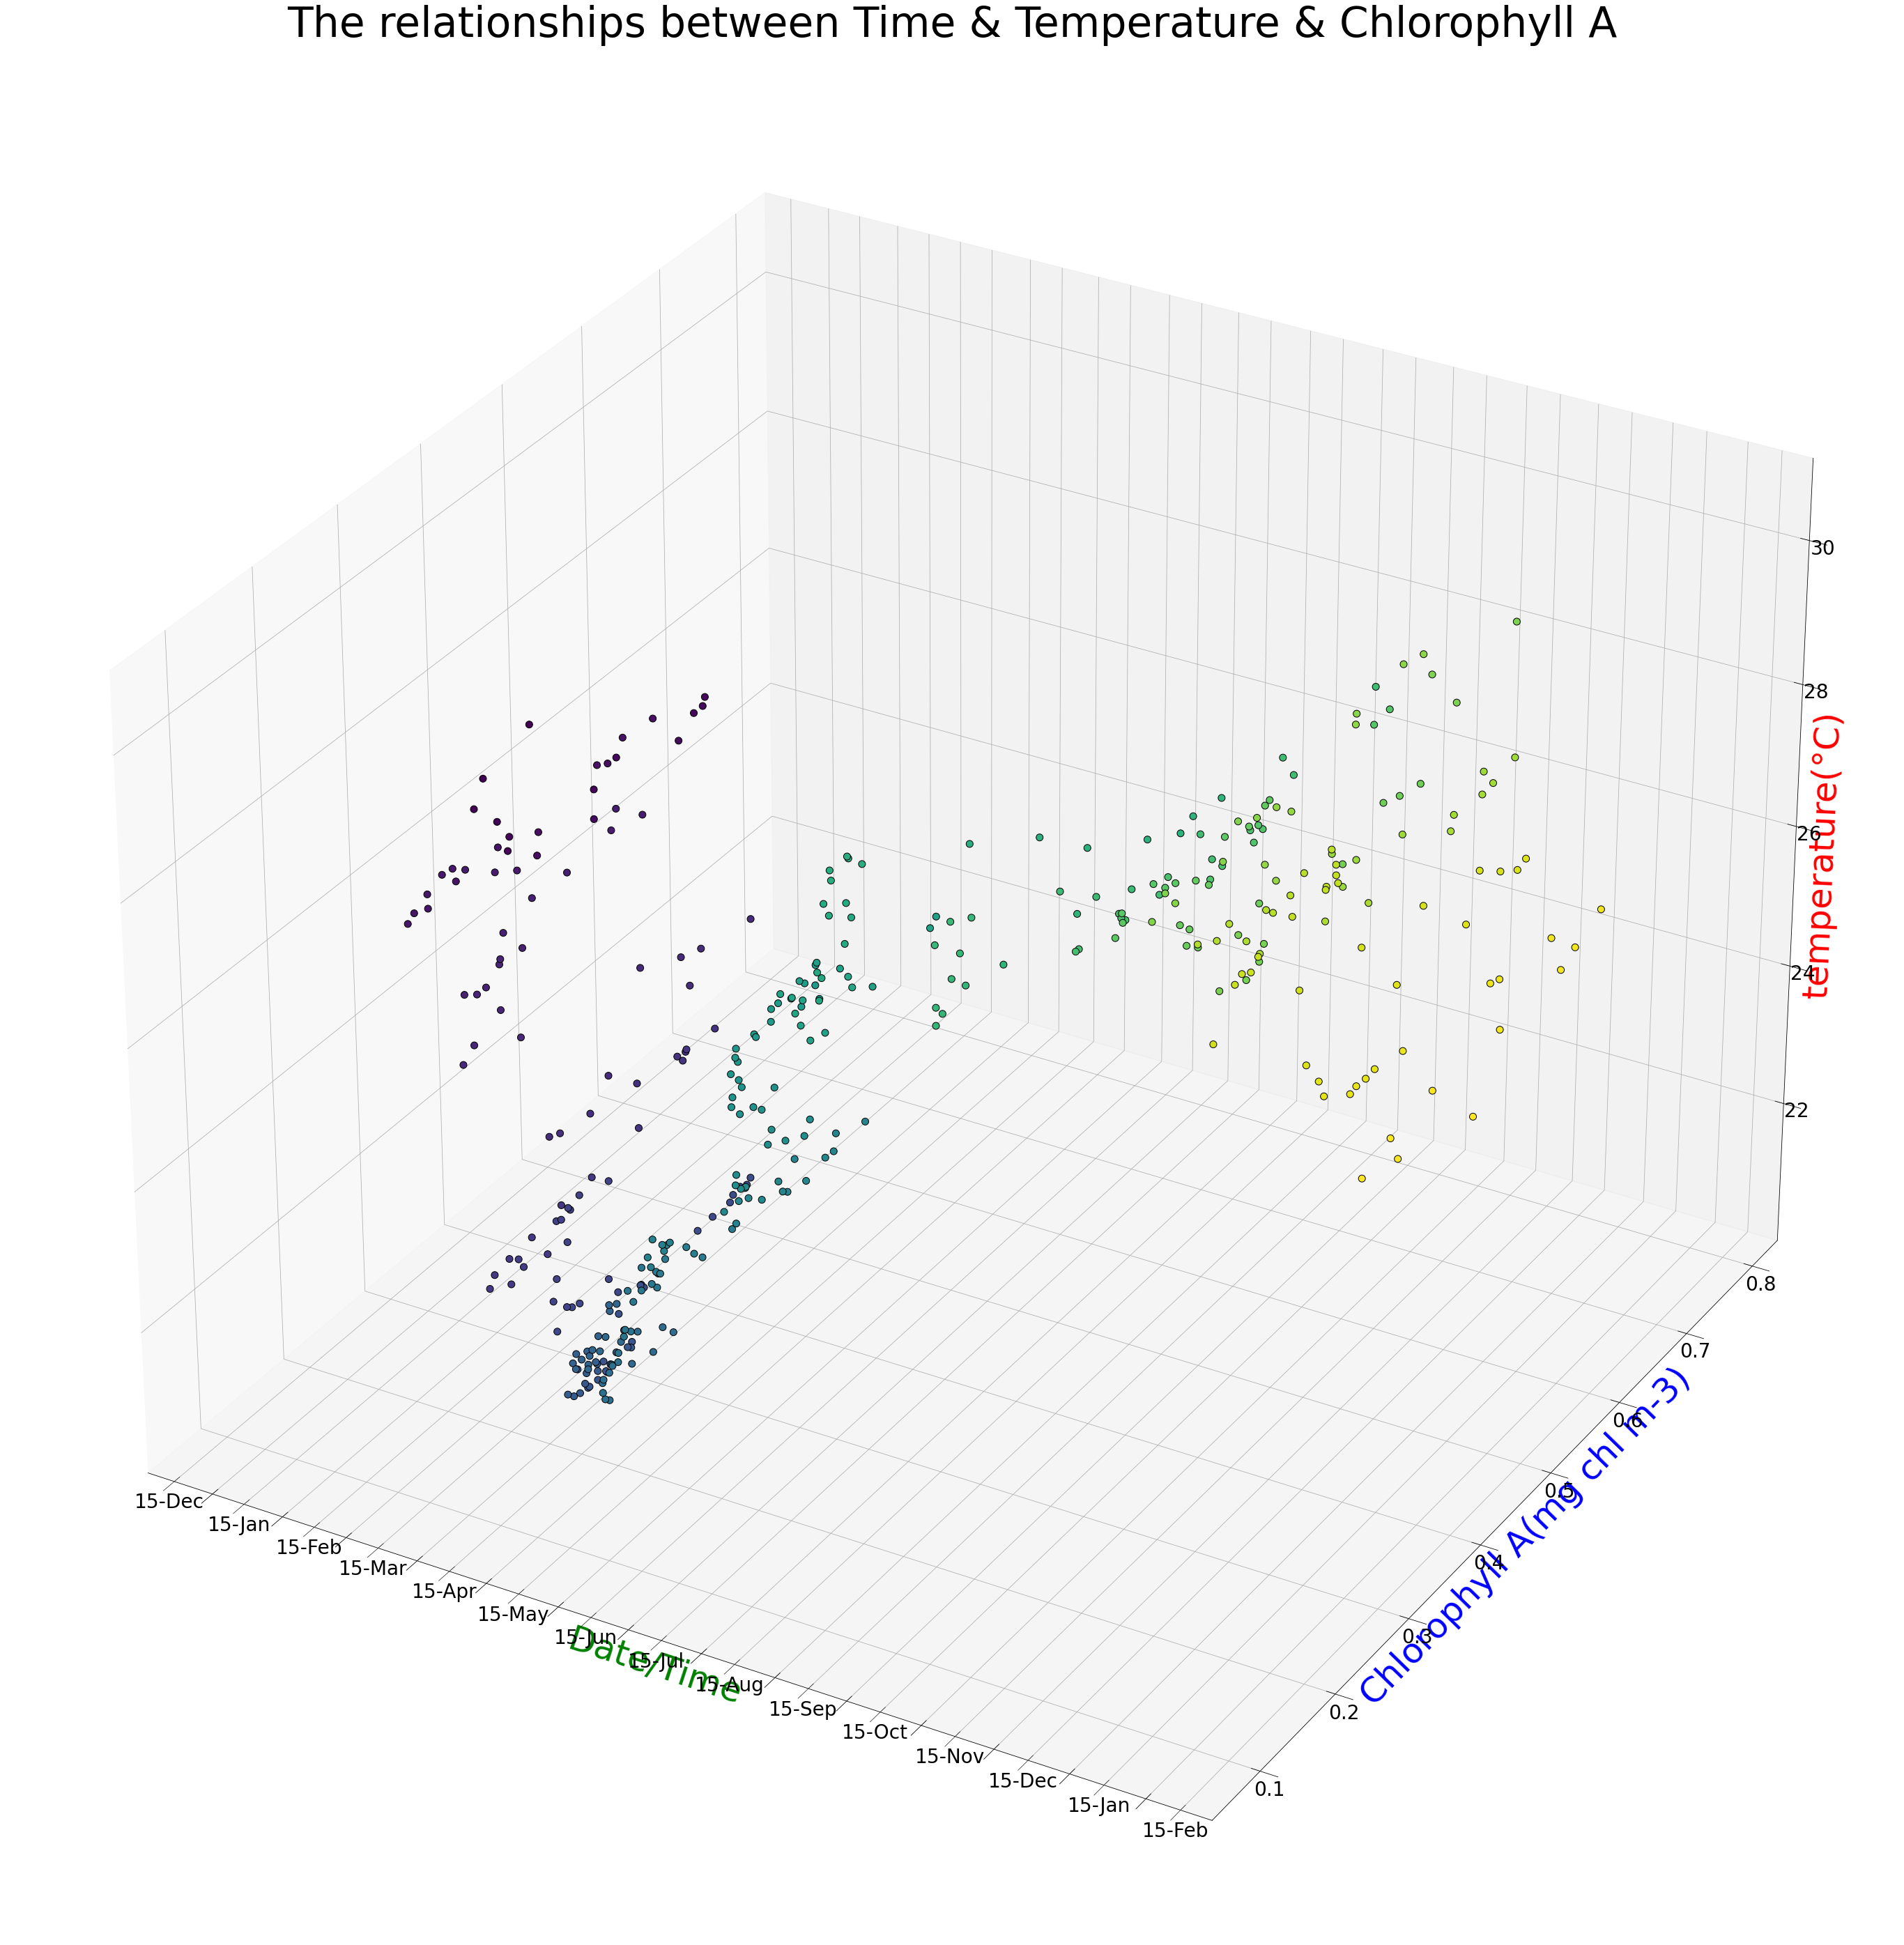

In [36]:

cm = plt.get_cmap("RdYlGn")

datelist = list(df2['Aggregated Date/Time'])[:]

col = np.arange(len(df.index))

plt.rc('xtick',labelsize=28)

fig = plt.figure(figsize=(50,50))
ax = plt.axes(projection='3d')

ax.scatter(df.index, df['mean'], df2['mean'], s=100, c=col, marker='o', edgecolors='k', depthshade=0)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=28)
ax.zaxis.set_tick_params(labelsize=28)


ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_minor_locator(MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(DateFormatter('%d-%b'))

ax.set_ylabel('Chlorophyll A(mg chl m-3)', color='b',size=50)
ax.set_zlabel('temperature(°C)', color='r',size=50)
ax.set_xlabel('Date/Time', color='g',size=50)

plt.xticks(rotation=45)
plt.title("The relationships between Time & Temperature & Chlorophyll A",size=60)

plt.savefig('new3D(done).jpg')
plt.show()

it can be concluded that the water temperature is inthe interval of 24 degrees to 26 degrees, and the time is at the end of spring and early summer that situation has the highestcorrelation with chlorophyll, and the fit of the three is the most linear. The two types of factors have the closest influence onchlorophyll concentration.